In [ ]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt

In [2]:
import tensorflow as tf
import autokeras as ak

### Load MNIST dataset

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training image shape:', x_train.shape) # (60000, 28, 28)
print('Training label shape:', y_train.shape) # (60000,)
print('First five training labels:', y_train[:5]) # array([5 0 4 1 9], dtype=uint8)

11501568/11490434 [==============================] - 0s 0us/step
Training image shape: (60000, 28, 28)
Training label shape: (60000,)
First five training labels: [5 0 4 1 9]


### Run the ImageClassifier

In [5]:
from kerastuner.engine import hyperparameters as hp


input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ConvBlock(num_blocks=2,
                           max_pooling=True,
                           separable=False,
                           dropout=0.0)(output_node)
output_node = ak.ClassificationHead(dropout=0.0)(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, 
    outputs=output_node,
    max_trials=10,
    overwrite=True,
    seed=42)

# Use the first 100 training samples as a quick demo.
# You may run with the full dataset, but expect a longer training time.
auto_model.fit(x_train[:100], y_train[:100], epochs=3)
test_loss, test_acc = auto_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', test_acc)

Trial 10 Complete [00h 00m 07s]
val_loss: 1.1846749782562256

Best val_loss So Far: 0.5675212144851685
Total elapsed time: 00h 01m 51s
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
4/4 [==============================] - 2s 323ms/step - loss: 2.2753 - accuracy: 0.1500
Epoch 2/3
4/4 [==============================] - 1s 333ms/step - loss: 1.9322 - accuracy: 0.5100
Epoch 3/3
4/4 [==============================] - 1s 329ms/step - loss: 1.4208 - accuracy: 0.6500
INFO:tensorflow:Assets written to: ./auto_model/best_model/assets
Test accuracy:  0.5523999929428101


### Get the summarized results during the tuning process (return the best 10 models if existed)

In [6]:
auto_model.tuner.results_summary(1)

Results summary
Results in ./auto_model
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
conv_block_2/kernel_size: 3
conv_block_2/num_layers: 2
conv_block_2/filters_0_0: 32
conv_block_2/filters_0_1: 512
conv_block_2/filters_1_0: 32
conv_block_2/filters_1_1: 32
classification_head_2/spatial_reduction_3/reduction_type: flatten
optimizer: adam
learning_rate: 0.001
classification_head_2/spatial_reduction_4/reduction_type: flatten
classification_head_2/spatial_reduction_5/reduction_type: global_max
classification_head_2/spatial_reduction_6/reduction_type: flatten
classification_head_2/spatial_reduction_7/reduction_type: flatten
classification_head_2/spatial_reduction_14/reduction_type: flatten
Score: 0.5675212144851685


### Retrieve & Display best model

In [7]:
best_model = auto_model.export_model()
best_model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 cast_to_float32_13 (CastToF  (None, 28, 28)           0         
 loat32)                                                         
                                                                 
 expand_last_dim_13 (ExpandL  (None, 28, 28, 1)        0         
 astDim)                                                         
                                                                 
 normalization_13 (Normaliza  (None, 28, 28, 1)        3         
 tion)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 26, 26, 32)        320       
                                                          

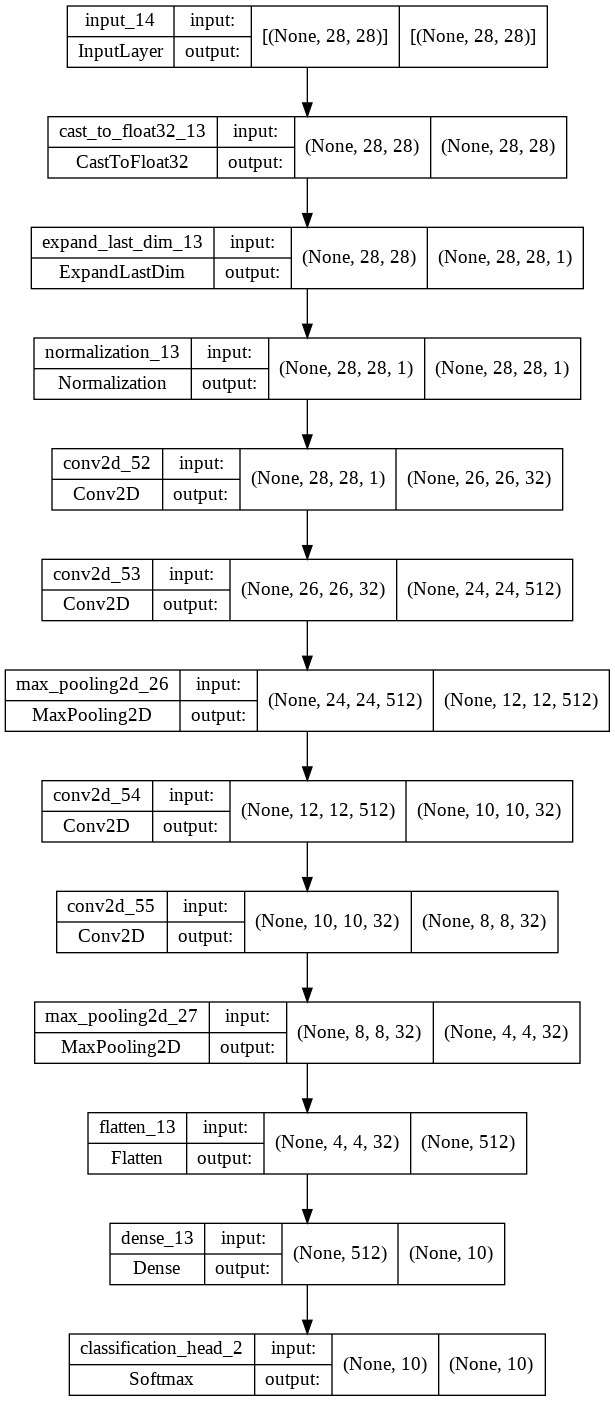

In [8]:
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True)


### Predict with the best model.


In [9]:
predicted_y = auto_model.predict(x_test)
print(predicted_y)

313/313 [==============================] - 36s 116ms/step
[['7']
 ['0']
 ['1']
 ...
 ['8']
 ['8']
 ['6']]
